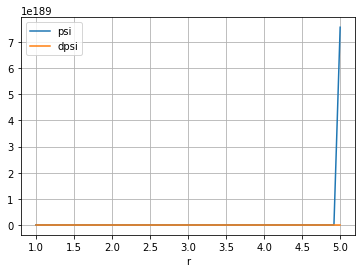

E = -5


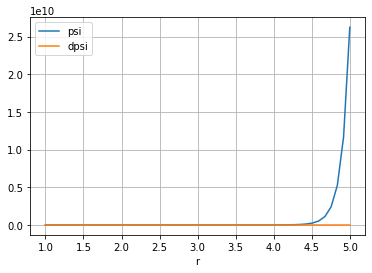

E = 0


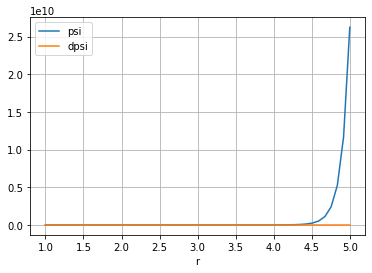

E = 0


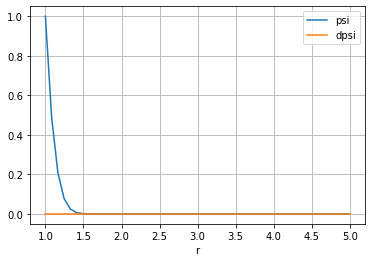

E = 5


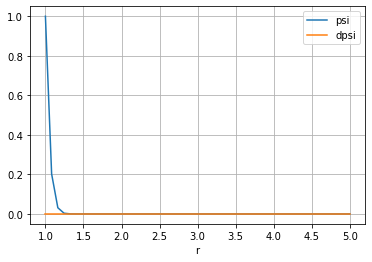

E = 10


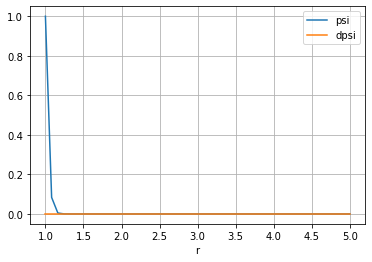

E = 15


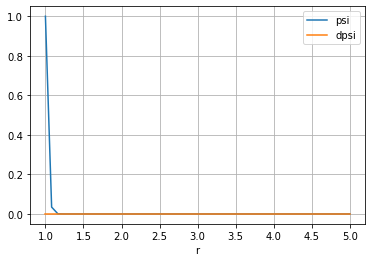

E = 20


In [3]:
# 5. Trying the radial schrodinger equation now
# Use H*psi + V*psi = E*psi where H = -1/(2*r^2)*d/dr(r^2*d/dr)
# Eq. from p. 81 of Quantum Mechanics by Abers
# Method: Turn the second order ODE to two first order ODEs
# Solve for psi and dpsi using solve_ivp - Nick's Python Lectures and https://www.youtube.com/watch?v=INBu1Pyj0Is

import scipy.integrate 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# v1 is going to be psi
# v2 is going to be r^2*dpsi
def func(r, psi, E, n):
    v1 = psi[0]*n # n = 1 in args for the sake of create a tuple in the argument
    v2 = r**2*psi[1]
    return (-2*r**2*(-1/r + E)*v1, v2/(r**2)) # expression for v2' then expression for v1'


xs = np.linspace(1, 5, 50)
# Note that the y0=[1, -1] applies to the initial conditions for v1 and v2
indexlist = list(range(10))
indexlist = indexlist[0::5]
neglist = [ -x for x in indexlist]
neglist.reverse()
neglist.extend(indexlist)
indexlist = neglist
indexlist.extend([10, 15, 20])
indexlist[0]
for index in indexlist:
    res = sp.integrate.solve_ivp(func, [1, 5], y0=[1, 0], t_eval=xs, args=(index, 1))
    plt.plot(xs, res.y[0], label='psi') # res.y is the list psi
    plt.plot(xs, res.y[1], label = 'dpsi')
    plt.legend(loc='best')
    plt.xlabel('r')
    plt.grid()
    plt.show()
    print('E =', index)

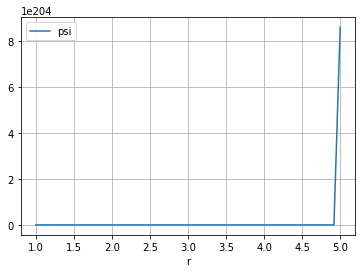

E = -20


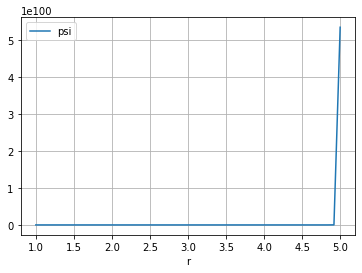

E = -10


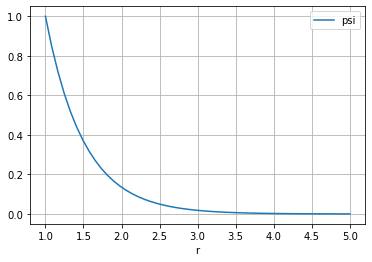

E = 0


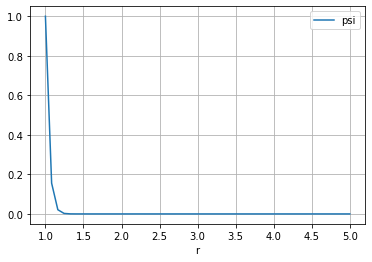

E = 10


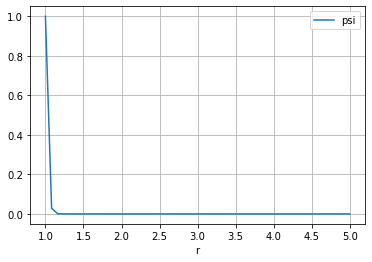

E = 20


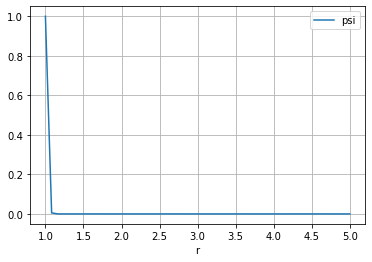

E = 30


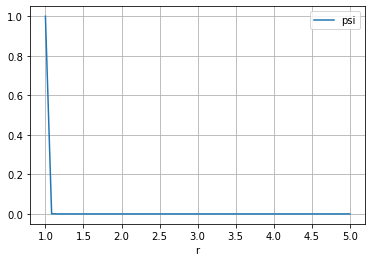

E = 40


In [4]:
# 6. Trying the radial schrodinger equation again with another equation where l = 0
# Use H*psi + V*psi = E*psi  
# where H*psi = -1/2*d**2/dr**2(r*psi) (hbar = m = 1)
# and V*psi = - r/r*psi
# and E*psi = E_r*r*psi
# Eq. from p. 211 of Quantum Physics for Dummies
# Method: Turn the second order ODE to two first order ODEs
# Solve for psi and dpsi using solve_ivp - Nick's Python Lectures and https://www.youtube.com/watch?v=INBu1Pyj0Is

import sympy as sym 
r = sym.Symbol('r')
import scipy.integrate 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# psi[0] = psi
# psi[1] = dpsi
def func(r, psi, E, n): # psi will hold the results, given by initial conditions
    v1 = r*psi[0] # n = 1 in args for the sake of create a tuple in the argument
    v2 = sym.diff(v1)
    return (-2*(1+E*r)*psi[0], v2) # expression for v2' then expression for v1'


xs = np.linspace(1, 5, 50)
# Note that the y0=[1, 0] applies to the initial conditions for v1 and v2

indexlist = list(range(50))
indexlist = indexlist[0::10]
neglist = [ -x for x in indexlist]
neglist.reverse()
neglist.extend(indexlist)
indexlist = neglist
del indexlist[0]
del indexlist[0]
del indexlist[2]
for index in indexlist:
    res = sp.integrate.solve_ivp(func, [1, 5], y0=[1, 0], t_eval=xs, args=(index, 1))
    plt.plot(xs, res.y[0], label='psi') # res.y is the list psi
    #plt.plot(xs, res.y[1], label = 'dpsi')
    plt.legend(loc='best')
    plt.xlabel('r')
    plt.grid()
    plt.show()
    print('E =', index)